In [13]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline


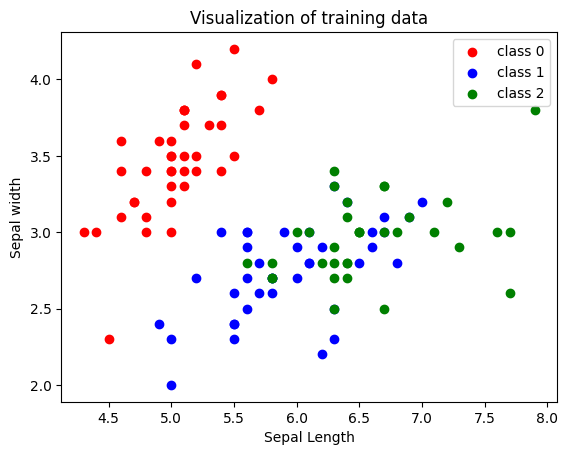

In [16]:
iris = load_iris()
X = iris.data[:,:2]     # choosing only the first two input features
Y = iris.target

number_of_samples = len(Y)

# split the dataset into training and test sets

random_indices = np.random.permutation(number_of_samples)

# training sets
num_training_samples = int(number_of_samples * 0.75)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]

# test sets
x_test = X[random_indices[num_training_samples:]]
y_test = Y[random_indices[num_training_samples:]]

# visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0])
Y_class0 = np.zeros((X_class0.shape[0]) , dtype=int)
X_class1 = np.asmatrix([x_train[i] for i in range (len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]) , dtype=int)
X_class2 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]) , fill_value=2 , dtype=int)


plt.scatter(X_class0[:,0].A1 , X_class0[:,1].A1 , color='red')
plt.scatter(X_class1[:,0].A1 , X_class1[:,1].A1 , color='blue')
plt.scatter(X_class2[:,0].A1 , X_class2[:,1].A1 , color='green')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.legend(['class 0' , 'class 1' , 'class 2'])
plt.title('Visualization of training data')
plt.show()






In [17]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5)  # k = 5
model.fit(x_train , y_train)

KNeighborsClassifier()

In [19]:
# Visualize the working of the algorithm
query_point = np.array([5.9 , 2.9])
true_class_of_query_point  = 1
predicted_class_of_query_point = model.predict([query_point])
print("Query Point: {}".format(query_point))
print("True Class of Query point : {}".format(true_class_of_query_point))


Query Point: [5.9 2.9]
True Class of Query point : 1


In [21]:
query_point.shape

(2,)

The Query point is: [5.9 2.9]

The nearest neighbors of the query point are:
 [[6.  2.9]
 [5.9 3. ]
 [6.  3. ]
 [5.8 2.8]
 [6.1 2.8]]

The classes of the nearest neighbors are: [1 1 2 2 1]

Predicted class for query point: 1


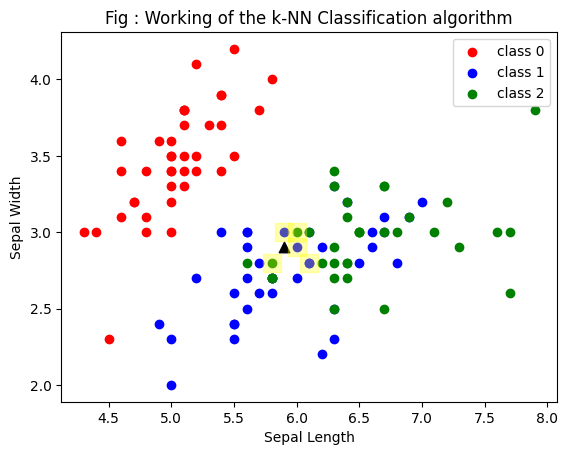

In [24]:
neighbors_object = neighbors.NearestNeighbors(n_neighbors=5)
neighbors_object.fit(x_train)
distances_of_nearest_neighbors , indices_of_nearest_neighbors_of_query_point = neighbors_object.kneighbors([query_point])
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point[0]]
print("The Query point is: {}\n".format(query_point))
print("The nearest neighbors of the query point are:\n {}\n".format(nearest_neighbors_of_query_point))
print("The classes of the nearest neighbors are: {}\n".format(y_train[indices_of_nearest_neighbors_of_query_point[0]]))
print("Predicted class for query point: {}".format(predicted_class_of_query_point[0]))



# plotting code part

plt.scatter(X_class0[:,0].A1 , X_class0[:,1].A1 , color = 'red')
plt.scatter(X_class1[:,0].A1 , X_class1[:,1].A1 , color='blue')
plt.scatter(X_class2[:,0].A1 , X_class2[:,1].A1 ,color ='green')
plt.scatter(query_point[0] , query_point[1] , marker='^' , s=57 , color='black')

plt.scatter(nearest_neighbors_of_query_point[:,0] , nearest_neighbors_of_query_point[:,1], marker='s' , s = 150 , color='yellow' , alpha=0.30)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['class 0' , 'class 1' , 'class 2'])
plt.title('Fig : Working of the k-NN Classification algorithm')
plt.show()

In [25]:
def evaluate_performance(model, x_test, y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    return test_misclassification_percentage

In [26]:
# evaluate the performance on the  validation and test sets

print("Evaluating K-NN classifier:")
test_err = evaluate_performance(model , x_test , y_test)
print("Test misclassification percentage = {}%".format(test_err))

Evaluating K-NN classifier:
Test misclassification percentage = 26.315789473684212%
